In [1]:
import pandas as pd

df = pd.read_csv("ReviewMieGacoan.csv")
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1866101453099860441,Mon Dec 09 12:43:51 +0000 2024,0,MIE GACOAN MASUK GOFOOD PAS GUE ANJAY YA ALLAH...,1866101453099860441,https://pbs.twimg.com/media/GeW5X7ca8AArbQ8.jpg,NaN,in,NaN,0,0,0,https://x.com/198906scnd/status/18661014530998...,1294770558723219456,198906scnd
1,1866099811881246782,Mon Dec 09 12:37:20 +0000 2024,0,INILAAH GACOAN YG SELALU KU RINDUKAN BERMINYAK...,1866099811881246782,https://pbs.twimg.com/media/GeW3IXTaQAAGQsf.jpg,NaN,in,(ily)chil,0,0,0,https://x.com/tyongie07/status/186609981188124...,1165138501081264128,tyongie07
2,1865974680277905650,Mon Dec 09 12:28:05 +0000 2024,0,@FOODFESS2 Gacoan sih kalo aku yg enak tu mie ...,1866097485254701311,NaN,FOODFESS2,in,"Kota Surabaya, Jawa Timur",0,0,0,https://x.com/snflwrr___/status/18660974852547...,1225590058360508418,snflwrr___
3,1866096913562644889,Mon Dec 09 12:27:34 +0000 2024,0,@yupnyamnyam mie gacoan kah kak?,1866097355759681810,NaN,yupnyamnyam,in,pjw lover,0,2,0,https://x.com/jwooparkkkk/status/1866097355759...,1588383154964160512,jwooparkkkk
4,1865796986265649658,Mon Dec 09 12:12:48 +0000 2024,0,@Sedang_di_isi @sagipussy Yaahh minimalnya bis...,1866093639182725441,NaN,Sedang_di_isi,in,Jakarta Capital Region,0,0,0,https://x.com/Dzulf_Herman/status/186609363918...,1299655178,Dzulf_Herman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1862453175942619240,Fri Nov 29 12:07:46 +0000 2024,0,@Rini_yuliastut1 @mie_gacoan @promo_BRI Iya ni...,1862468495201771672,NaN,Rini_yuliastut1,in,"Indramayu, Indonesia",0,0,0,https://x.com/malagreta/status/186246849520177...,1357069646,malagreta
1003,1862466097733410844,Fri Nov 29 12:07:35 +0000 2024,0,@mie_gacoan Tolong di cek lagi dong kebersihan...,1862468447852195928,NaN,Anxdy3,in,NaN,0,0,0,https://x.com/Anxdy3/status/1862468447852195928,1440256404640567298,Anxdy3
1004,1862467631976259873,Fri Nov 29 12:04:21 +0000 2024,0,: Ce beliin papi gacoan dong yang level 3 aja ...,1862467631976259873,NaN,NaN,in,"Valse ( A major, Act I ).",0,0,0,https://x.com/Langhacm/status/1862467631976259873,1487802750272344067,Langhacm
1005,1862456692954603634,Fri Nov 29 11:56:44 +0000 2024,1,@Qyunniebahng Lagi di warung seblak dan urat m...,1862465716903137694,NaN,Qyunniebahng,in,NaN,0,1,0,https://x.com/oingoingmong/status/186246571690...,1597652632218529793,oingoingmong


In [1]:
!pip install torch torchvision torchaudio transformers

In [2]:
!pip install nlp-id

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.47.1 requires huggingface-hub<1.0,>=0.24.0, but you have huggingface-hub 0.23.4 which is incompatible.



  Using cached huggingface_hub-0.23.4-py3-none-any.whl.metadata (12 kB)
Using cached huggingface_hub-0.23.4-py3-none-any.whl (402 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.27.0
    Uninstalling huggingface-hub-0.27.0:
      Successfully uninstalled huggingface-hub-0.27.0


In [3]:
%pip install sastrawi

  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl.metadata (909 bytes)
Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install pandas

In [1]:
# Import pustaka
import pandas as pd
import re

# Membaca dataset ReviewMieGacoan.csv
df = pd.read_csv("ReviewMieGacoan.csv")

# Fungsi untuk membersihkan teks
def clean_text(doc):
    doc = re.sub(r'@[A-Za-z0-9]+', '', doc)  # Remove mentions
    doc = re.sub(r'#[A-Za-z0-9]+', '', doc)  # Remove hashtags
    doc = re.sub(r'RT[\s]', '', doc)         # Remove RT
    doc = re.sub(r"http\S+", '', doc)        # Remove links
    doc = re.sub(r'[0-9]+', '', doc)         # Remove numbers
    doc = re.sub(r'(.)\1+', r'\1\1', doc)    # Handle repeated characters
    doc = re.sub(r'[^a-zA-Z]', ' ', doc)     # Remove special characters
    doc = doc.strip()
    doc = doc.lower()  # Convert to lowercase
    return doc

# Membersihkan teks pada kolom full_text
df['clean_text'] = df['full_text'].map(clean_text)

# Menyimpan hanya kolom 'full_text' dan 'clean_text' ke file CSV baru
df[['full_text', 'clean_text']].to_csv("ReviewMieGacoan_Cleaned.csv", index=False)

# Membaca hasil CSV yang telah diproses
df_cleaned = pd.read_csv("ReviewMieGacoan_Cleaned.csv")

# Menampilkan hasil CSV
display(df_cleaned)  # Menampilkan 5 baris pertama dari file CSV

,full_text,clean_text
0,MIE GACOAN MASUK GOFOOD PAS GUE ANJAY YA ALLAH...,mie gacoan masuk gofood pas gue anjay ya allah...
1,INILAAH GACOAN YG SELALU KU RINDUKAN BERMINYAK...,inilaah gacoan yg selalu ku rindukan berminyak...
2,@FOODFESS2 Gacoan sih kalo aku yg enak tu mie ...,gacoan sih kalo aku yg enak tu mie gacoan udan...
3,@yupnyamnyam mie gacoan kah kak?,mie gacoan kah kak
4,@Sedang_di_isi @sagipussy Yaahh minimalnya bis...,di isi yaahh minimalnya bisa megang parkiran ...
...,...,...
1002,@Rini_yuliastut1 @mie_gacoan @promo_BRI Iya ni...,yuliastut gacoan bri iya niatnya hemat malah...
1003,@mie_gacoan Tolong di cek lagi dong kebersihan...,gacoan tolong di cek lagi dong kebersihan bara...
1004,: Ce beliin papi gacoan dong yang level 3 aja ...,ce beliin papi gacoan dong yang level aja gw ...
1005,@Qyunniebahng Lagi di warung seblak dan urat m...,lagi di warung seblak dan urat malunya masih n...


In [2]:
# Import pustaka
import json
import pandas as pd

# Memasukkan kamus kata tidak baku
with open("kamus_bahasa_baku.txt", "r") as f:
    formal_indo = json.load(f)

# Memasukkan dataset hasil text cleaning
df = pd.read_csv("ReviewMieGacoan_Cleaned.csv")

# Fungsi untuk normalisasi teks
def informal_to_formal_indo(text):
    return " ".join(formal_indo.get(word, word) for word in text.split())

# Menjalankan fungsi normalisasi untuk mengganti kata tidak baku pada dataset
df['normalized_text'] = df['clean_text'].map(informal_to_formal_indo)

# Menyimpan hasil normalisasi ke file CSV baru
df[['clean_text', 'normalized_text']].to_csv("ReviewMieGacoan_Normalized.csv", index=False)

# Membaca hasil CSV yang telah diproses
df_normalized = pd.read_csv("ReviewMieGacoan_Normalized.csv")

# Menampilkan hasil teks setelah proses normalisasi
display(df_normalized)  # Menampilkan 5 baris pertama dari file CSV

,clean_text,normalized_text
0,mie gacoan masuk gofood pas gue anjay ya allah...,mie gacoan masuk gofood pas saya anjay iya all...
1,inilaah gacoan yg selalu ku rindukan berminyak...,inilaah gacoan yang selalu ku rindukan berminy...
2,gacoan sih kalo aku yg enak tu mie gacoan udan...,gacoan sih kalau aku yang enak tu mie gacoan u...
3,mie gacoan kah kak,mie gacoan kah kak
4,di isi yaahh minimalnya bisa megang parkiran ...,di isi yaahh minimalnya bisa megang parkiran m...
...,...,...
1002,yuliastut gacoan bri iya niatnya hemat malah...,yuliastut gacoan bri iya niatnya hemat bahkan ...
1003,gacoan tolong di cek lagi dong kebersihan bara...,gacoan tolong di cek lagi dong kebersihan bara...
1004,ce beliin papi gacoan dong yang level aja gw ...,cewek belikan papi gacoan dong yang level saja...
1005,lagi di warung seblak dan urat malunya masih n...,lagi di warung seblak dan urat malunya masih n...


In [3]:
# Import pustaka
from nlp_id.tokenizer import Tokenizer

# Inisialisasi tokenizer
tokenizer = Tokenizer()

# Fungsi untuk tokenisasi teks
def tokenize_text(doc):
    return tokenizer.tokenize(doc)

# Tokenisasi teks menggunakan kolom 'normalized_text'
df['tokens'] = df['normalized_text'].map(tokenize_text)

# Menyimpan hasil tokenisasi ke file CSV baru
df[['normalized_text', 'tokens']].to_csv("ReviewMieGacoan_Tokenized.csv", index=False)

# Membaca hasil CSV yang telah diproses
df_tokens = pd.read_csv("ReviewMieGacoan_Tokenized.csv")

# Menampilkan hasil teks setelah proses normalisasi
display(df_tokens)  # Menampilkan 5 baris pertama dari file CSV

,normalized_text,tokens
0,mie gacoan masuk gofood pas saya anjay iya all...,"['mie', 'gacoan', 'masuk', 'gofood', 'pas', 's..."
1,inilaah gacoan yang selalu ku rindukan berminy...,"['inilaah', 'gacoan', 'yang', 'selalu', 'ku', ..."
2,gacoan sih kalau aku yang enak tu mie gacoan u...,"['gacoan', 'sih', 'kalau', 'aku', 'yang', 'ena..."
3,mie gacoan kah kak,"['mie', 'gacoan', 'kah', 'kak']"
4,di isi yaahh minimalnya bisa megang parkiran m...,"['di', 'isi', 'yaahh', 'minimal', 'nya', 'bisa..."
...,...,...
1002,yuliastut gacoan bri iya niatnya hemat bahkan ...,"['yuliastut', 'gacoan', 'bri', 'iya', 'niat', ..."
1003,gacoan tolong di cek lagi dong kebersihan bara...,"['gacoan', 'tolong', 'di', 'cek', 'lagi', 'don..."
1004,cewek belikan papi gacoan dong yang level saja...,"['cewek', 'belikan', 'papi', 'gacoan', 'dong',..."
1005,lagi di warung seblak dan urat malunya masih n...,"['lagi', 'di', 'warung', 'seblak', 'dan', 'ura..."


In [4]:
# Import pustaka
from nlp_id.stopword import StopWord

# Inisialisasi stopword
stopword = StopWord()

# Fungsi untuk menghapus stopword
def remove_stopwords(tokens):
    stopwords = stopword.get_stopword()
    return [word for word in tokens if word not in stopwords]

# Menghapus stopwords dari hasil tokenisasi
df['stopwords'] = df['tokens'].map(remove_stopwords)

# Menyimpan hasil penghapusan stopword ke file CSV baru
df[['tokens', 'stopwords']].to_csv("ReviewMieGacoan_Stopwords.csv", index=False)

# Membaca hasil CSV yang telah diproses
df_tokens = pd.read_csv("ReviewMieGacoan_Stopwords.csv")

# Menampilkan hasil teks setelah proses normalisasi
display(df_tokens)  # Menampilkan 5 baris pertama dari file CSV

,tokens,stopwords
0,"['mie', 'gacoan', 'masuk', 'gofood', 'pas', 's...","['mie', 'gacoan', 'masuk', 'gofood', 'anjay', ..."
1,"['inilaah', 'gacoan', 'yang', 'selalu', 'ku', ...","['inilaah', 'gacoan', 'ku', 'rindukan', 'bermi..."
2,"['gacoan', 'sih', 'kalau', 'aku', 'yang', 'ena...","['gacoan', 'enak', 'tu', 'mie', 'gacoan', 'uda..."
3,"['mie', 'gacoan', 'kah', 'kak']","['mie', 'gacoan', 'kah', 'kak']"
4,"['di', 'isi', 'yaahh', 'minimal', 'nya', 'bisa...","['isi', 'yaahh', 'minimal', 'megang', 'parkira..."
...,...,...
1002,"['yuliastut', 'gacoan', 'bri', 'iya', 'niat', ...","['yuliastut', 'gacoan', 'bri', 'niat', 'hemat'..."
1003,"['gacoan', 'tolong', 'di', 'cek', 'lagi', 'don...","['gacoan', 'tolong', 'cek', 'kebersihan', 'bar..."
1004,"['cewek', 'belikan', 'papi', 'gacoan', 'dong',...","['cewek', 'belikan', 'papi', 'gacoan', 'level'..."
1005,"['lagi', 'di', 'warung', 'seblak', 'dan', 'ura...","['warung', 'seblak', 'urat', 'malu', 'nyambung..."


In [5]:
# Import pustaka
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming teks, kecuali kata "gacoan"
def stem_tokens(tokens):
    return [word if word == "gacoan" else stemmer.stem(word) for word in tokens]

# Menjalankan stemming pada teks hasil penghapusan stopwords
df['stemmed_tokens'] = df['stopwords'].map(stem_tokens)

# Menyimpan hasil stemming ke file CSV baru
df[['stopwords', 'stemmed_tokens']].to_csv("ReviewMieGacoan_Stemmed.csv", index=False)

# Membaca hasil CSV yang telah diproses
df_tokens = pd.read_csv("ReviewMieGacoan_Stemmed.csv")

# Menampilkan hasil teks setelah proses stemming
display(df_tokens)  # Menampilkan 5 baris pertama dari file CSV

,stopwords,stemmed_tokens
0,"['mie', 'gacoan', 'masuk', 'gofood', 'anjay', ...","['mie', 'gacoan', 'masuk', 'gofood', 'anjay', ..."
1,"['inilaah', 'gacoan', 'ku', 'rindukan', 'bermi...","['inilaah', 'gacoan', 'ku', 'rindu', 'minyak',..."
2,"['gacoan', 'enak', 'tu', 'mie', 'gacoan', 'uda...","['gacoan', 'enak', 'tu', 'mie', 'gacoan', 'uda..."
3,"['mie', 'gacoan', 'kah', 'kak']","['mie', 'gacoan', 'kah', 'kak']"
4,"['isi', 'yaahh', 'minimal', 'megang', 'parkira...","['isi', 'yaahh', 'minimal', 'megang', 'parkir'..."
...,...,...
1002,"['yuliastut', 'gacoan', 'bri', 'niat', 'hemat'...","['yuliastut', 'gacoan', 'bri', 'niat', 'hemat'..."
1003,"['gacoan', 'tolong', 'cek', 'kebersihan', 'bar...","['gacoan', 'tolong', 'cek', 'bersih', 'barang'..."
1004,"['cewek', 'belikan', 'papi', 'gacoan', 'level'...","['cewek', 'belikan', 'papi', 'gacoan', 'level'..."
1005,"['warung', 'seblak', 'urat', 'malu', 'nyambung...","['warung', 'seblak', 'urat', 'malu', 'nyambung..."


In [7]:
# Import pustaka yang diperlukan
import pandas as pd

# Load tiga file kamus faktor
fisik_kamus_path = 'kamus_fisik.xlsx'
psikologis_kamus_path = 'kamus_psikologis.xlsx'
ekonomi_kamus_path = 'kamus_ekonomi.xlsx'

# Fungsi untuk membaca file kamus dan mengembalikan daftar kata kunci
def load_kamus(kamus_path):
    kamus_df = pd.read_excel(kamus_path)
    if 'word' not in kamus_df.columns:
        raise ValueError(f"File {kamus_path} harus memiliki kolom 'word'.")
    keywords = kamus_df['word'].dropna().tolist()
    keywords = [keyword.strip().lower() for keyword in keywords]
    return keywords

# Memuat kata kunci dari masing-masing faktor
kamus_fisik = load_kamus(fisik_kamus_path)
kamus_psikologis = load_kamus(psikologis_kamus_path)
kamus_ekonomi = load_kamus(ekonomi_kamus_path)

# Fungsi identifikasi faktor berdasarkan kata kunci
def identifikasi_faktor(text, keywords):
    # Jika text berupa list, gabungkan menjadi string
    if isinstance(text, list):
        text = " ".join(text)  # Gabungkan list menjadi string
    text = text.lower()  # Ubah teks menjadi huruf kecil
    return any(keyword in text for keyword in keywords)

# Proses identifikasi faktor pada kolom 'stemmed_tokens'
df['is_fisik'] = df['stemmed_tokens'].map(lambda x: identifikasi_faktor(x, kamus_fisik))
df['is_psikologis'] = df['stemmed_tokens'].map(lambda x: identifikasi_faktor(x, kamus_psikologis))
df['is_ekonomi'] = df['stemmed_tokens'].map(lambda x: identifikasi_faktor(x, kamus_ekonomi))

# Menambahkan kolom "Bukan Faktor" untuk teks yang tidak termasuk kategori apa pun
df['is_bukan_faktor'] = ~(df['is_fisik'] | df['is_psikologis'] | df['is_ekonomi'])

# Mengubah hasil identifikasi menjadi kategori faktor
def map_faktor(row):
    if row['is_fisik']:
        return "Faktor Fisik"
    elif row['is_psikologis']:
        return "Faktor Psikologis"
    elif row['is_ekonomi']:
        return "Faktor Ekonomi"
    else:
        return "Bukan Faktor"

df['sentiment'] = df.apply(map_faktor, axis=1)

# Menyimpan hasil analisis lengkap ke file CSV
output_csv_path = 'hasil_analisis_lengkap.csv'

# Membaca hasil CSV yang telah diproses
df_analisis = pd.read_csv("hasil_analisis_lengkap.csv")

# Menampilkan hasil teks setelah proses analisis lengkap
display(df_analisis)  # Menampilkan 5 baris pertama dari file CSV

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,clean_text,normalized_text,tokens,stopwords,stemmed_tokens,is_fisik,is_psikologis,is_ekonomi,is_bukan_faktor,sentiment
0,1866101453099860441,Mon Dec 09 12:43:51 +0000 2024,0,MIE GACOAN MASUK GOFOOD PAS GUE ANJAY YA ALLAH...,1866101453099860441,https://pbs.twimg.com/media/GeW5X7ca8AArbQ8.jpg,NaN,in,NaN,0,...,mie gacoan masuk gofood pas gue anjay ya allah...,mie gacoan masuk gofood pas saya anjay iya all...,"['mie', 'gacoan', 'masuk', 'gofood', 'pas', 's...","['mie', 'gacoan', 'masuk', 'gofood', 'anjay', ...","['mie', 'gacoan', 'masuk', 'gofood', 'anjay', ...",False,True,False,False,Faktor Psikologis
1,1866099811881246782,Mon Dec 09 12:37:20 +0000 2024,0,INILAAH GACOAN YG SELALU KU RINDUKAN BERMINYAK...,1866099811881246782,https://pbs.twimg.com/media/GeW3IXTaQAAGQsf.jpg,NaN,in,(ily)chil,0,...,inilaah gacoan yg selalu ku rindukan berminyak...,inilaah gacoan yang selalu ku rindukan berminy...,"['inilaah', 'gacoan', 'yang', 'selalu', 'ku', ...","['inilaah', 'gacoan', 'ku', 'rindukan', 'bermi...","['inilaah', 'gacoan', 'ku', 'rindu', 'minyak',...",True,True,False,False,Faktor Fisik
2,1865974680277905650,Mon Dec 09 12:28:05 +0000 2024,0,@FOODFESS2 Gacoan sih kalo aku yg enak tu mie ...,1866097485254701311,NaN,FOODFESS2,in,"Kota Surabaya, Jawa Timur",0,...,gacoan sih kalo aku yg enak tu mie gacoan udan...,gacoan sih kalau aku yang enak tu mie gacoan u...,"['gacoan', 'sih', 'kalau', 'aku', 'yang', 'ena...","['gacoan', 'enak', 'tu', 'mie', 'gacoan', 'uda...","['gacoan', 'enak', 'tu', 'mie', 'gacoan', 'uda...",False,True,False,False,Faktor Psikologis
3,1866096913562644889,Mon Dec 09 12:27:34 +0000 2024,0,@yupnyamnyam mie gacoan kah kak?,1866097355759681810,NaN,yupnyamnyam,in,pjw lover,0,...,mie gacoan kah kak,mie gacoan kah kak,"['mie', 'gacoan', 'kah', 'kak']","['mie', 'gacoan', 'kah', 'kak']","['mie', 'gacoan', 'kah', 'kak']",False,False,False,True,Bukan Faktor
4,1865796986265649658,Mon Dec 09 12:12:48 +0000 2024,0,@Sedang_di_isi @sagipussy Yaahh minimalnya bis...,1866093639182725441,NaN,Sedang_di_isi,in,Jakarta Capital Region,0,...,di isi yaahh minimalnya bisa megang parkiran ...,di isi yaahh minimalnya bisa megang parkiran m...,"['di', 'isi', 'yaahh', 'minimal', 'nya', 'bisa...","['isi', 'yaahh', 'minimal', 'megang', 'parkira...","['isi', 'yaahh', 'minimal', 'megang', 'parkir'...",False,False,False,True,Bukan Faktor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1862453175942619240,Fri Nov 29 12:07:46 +0000 2024,0,@Rini_yuliastut1 @mie_gacoan @promo_BRI Iya ni...,1862468495201771672,NaN,Rini_yuliastut1,in,"Indramayu, Indonesia",0,...,yuliastut gacoan bri iya niatnya hemat malah...,yuliastut gacoan bri iya niatnya hemat bahkan ...,"['yuliastut', 'gacoan', 'bri', 'iya', 'niat', ...","['yuliastut', 'gacoan', 'bri', 'niat', 'hemat'...","['yuliastut', 'gacoan', 'bri', 'niat', 'hemat'...",False,False,True,False,Faktor Ekonomi
1003,1862466097733410844,Fri Nov 29 12:07:35 +0000 2024,0,@mie_gacoan Tolong di cek lagi dong kebersihan...,1862468447852195928,NaN,Anxdy3,in,NaN,0,...,gacoan tolong di cek lagi dong kebersihan bara...,gacoan tolong di cek lagi dong kebersihan bara...,"['gacoan', 'tolong', 'di', 'cek', 'lagi', 'don...","['gacoan', 'tolong', 'cek', 'kebersihan', 'bar...","['gacoan', 'tolong', 'cek', 'bersih', 'barang'...",True,True,False,False,Faktor Fisik
1004,1862467631976259873,Fri Nov 29 12:04:21 +0000 2024,0,: Ce beliin papi gacoan dong yang level 3 aja ...,1862467631976259873,NaN,NaN,in,"Valse ( A major, Act I ).",0,...,ce beliin papi gacoan dong yang level aja gw ...,cewek belikan papi gacoan dong yang level saja...,"['cewek', 'belikan', 'papi', 'gacoan', 'dong',...","['cewek', 'belikan', 'papi', 'gacoan', 'level'...","['cewek', 'belikan', 'papi', 'gacoan', 'level'...",False,True,True,False,Faktor Psikologis
1005,1862456692954603634,Fri Nov 29 11:56:44 +0000

In [2]:
!pip install fuzzywuzzy


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import pustaka yang diperlukan
import pandas as pd
from fuzzywuzzy import fuzz

# Load dataset yang sudah melalui preprocessing (stopwords removal & stemming)
df = pd.read_csv("ReviewMieGacoan_Stemmed.csv")

# Gabungkan token hasil stemming menjadi teks untuk identifikasi faktor
df['stemmed_text'] = df['stemmed_tokens'].apply(lambda x: " ".join(eval(x)) if isinstance(x, str) else "")

# Load tiga file kamus faktor
fisik_kamus_path = 'kamus_fisik.xlsx'
psikologis_kamus_path = 'kamus_psikologis.xlsx'
ekonomi_kamus_path = 'kamus_ekonomi.xlsx'

# Fungsi untuk membaca file kamus dan mengembalikan daftar kata kunci
def load_kamus(kamus_path):
    kamus_df = pd.read_excel(kamus_path)
    if 'word' not in kamus_df.columns:
        raise ValueError(f"File {kamus_path} harus memiliki kolom 'word'.")
    return [keyword.strip().lower() for keyword in kamus_df['word'].dropna().tolist()]

# Memuat kata kunci dari masing-masing faktor
kamus_fisik = load_kamus(fisik_kamus_path)
kamus_psikologis = load_kamus(psikologis_kamus_path)
kamus_ekonomi = load_kamus(ekonomi_kamus_path)

# Fungsi untuk mencocokkan teks dengan kata kunci menggunakan Fuzzy Matching
def fuzzy_match(text, keywords, threshold=80):
    text = text.lower()  # Ubah menjadi huruf kecil
    for keyword in keywords:
        if fuzz.partial_ratio(keyword, text) >= threshold:
            return True
    return False

# Proses identifikasi faktor menggunakan teks hasil stemming
df['is_fisik'] = df['stemmed_text'].map(lambda x: fuzzy_match(x, kamus_fisik))
df['is_psikologis'] = df['stemmed_text'].map(lambda x: fuzzy_match(x, kamus_psikologis))
df['is_ekonomi'] = df['stemmed_text'].map(lambda x: fuzzy_match(x, kamus_ekonomi))

# Menentukan kategori faktor secara otomatis
df['is_bukan_faktor'] = ~(df['is_fisik'] | df['is_psikologis'] | df['is_ekonomi'])

# Menentukan kategori berdasarkan faktor yang ditemukan
def map_faktor(row):
    if row['is_fisik']:
        return "Faktor Fisik"
    elif row['is_psikologis']:
        return "Faktor Psikologis"
    elif row['is_ekonomi']:
        return "Faktor Ekonomi"
    else:
        return "Bukan Faktor"

df['sentiment'] = df.apply(map_faktor, axis=1)

# Menyimpan hasil analisis ke file CSV
df.to_csv("hasil_analisis_fuzzy.csv", index=False)

# Membaca hasil CSV yang telah diproses
df_analisis = pd.read_csv("hasil_analisis_fuzzy.csv")

# Menampilkan hasil teks setelah proses analisis lengkap
display(df_analisis)  # Menampilkan 5 baris pertama dari file CSV

C:\Perkuliahan\Semester Terakhir\TugasAkhir\Program\pythonProject1\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,stopwords,stemmed_tokens,stemmed_text,is_fisik,is_psikologis,is_ekonomi,is_bukan_faktor,sentiment
0,"['mie', 'gacoan', 'masuk', 'gofood', 'anjay', ...","['mie', 'gacoan', 'masuk', 'gofood', 'anjay', ...",mie gacoan masuk gofood anjay allah bahagia,False,True,True,False,Faktor Psikologis
1,"['inilaah', 'gacoan', 'ku', 'rindukan', 'bermi...","['inilaah', 'gacoan', 'ku', 'rindu', 'minyak',...",inilaah gacoan ku rindu minyak amp yamin caban...,True,True,False,False,Faktor Fisik
2,"['gacoan', 'enak', 'tu', 'mie', 'gacoan', 'uda...","['gacoan', 'enak', 'tu', 'mie', 'gacoan', 'uda...",gacoan enak tu mie gacoan udang keju somay,False,True,False,False,Faktor Psikologis
3,"['mie', 'gacoan', 'kah', 'kak']","['mie', 'gacoan', 'kah', 'kak']",mie gacoan kah kak,False,False,False,True,Bukan Faktor
4,"['isi', 'yaahh', 'minimal', 'megang', 'parkira...","['isi', 'yaahh', 'minimal', 'megang', 'parkir'...",isi yaahh minimal megang parkir mie gacoan,True,False,False,False,Faktor Fisik
...,...,...,...,...,...,...,...,...
1002,"['yuliastut', 'gacoan', 'bri', 'niat', 'hemat'...","['yuliastut', 'gacoan', 'bri', 'niat', 'hemat'...",yuliastut gacoan bri niat hemat boncos,False,False,True,False,Faktor Ekonomi
1003,"['gacoan', 'tolong', 'cek', 'kebersihan', 'bar...","['gacoan', 'tolong', 'cek', 'bersih', 'barang'...",gacoan tolong cek bersih barang mise en scene ...,True,True,False,False,Faktor Fisik
1004,"['cewek', 'belikan', 'papi', 'gacoan', 'level'...","['cewek', 'belikan', 'papi', 'gacoan', 'level'...",cewek belikan papi gacoan level pedes sen leve...,False,True,True,False,Faktor Psikologis
1005,"['warung', 'seblak', 'urat', 'malu', 'nyambung...","['warung', 'seblak', 'urat', 'malu', 'nyambung...",warung seblak urat malu nyambung gak kaya abin...,False,False,False,True,Bukan Faktor


In [10]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [3]:
# Import pustaka
import pandas as pd
import re
import json
from nlp_id.tokenizer import Tokenizer
from nlp_id.stopword import StopWord
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membaca dataset ReviewMieGacoan.csv
df = pd.read_csv("ReviewMieGacoan.csv")

# Fungsi untuk membersihkan teks
def clean_text(doc):
    doc = re.sub(r'@[A-Za-z0-9]+', '', doc)  # Remove mentions
    doc = re.sub(r'#[A-Za-z0-9]+', '', doc)  # Remove hashtags
    doc = re.sub(r'RT[\s]', '', doc)         # Remove RT
    doc = re.sub(r"http\S+", '', doc)        # Remove links
    doc = re.sub(r'[0-9]+', '', doc)         # Remove numbers
    doc = re.sub(r'(.)\1+', r'\1\1', doc)    # Handle repeated characters
    doc = re.sub(r'[^a-zA-Z]', ' ', doc)     # Remove special characters
    doc = doc.strip()
    doc = doc.lower()  # Convert to lowercase
    return doc

# Membersihkan teks pada kolom full_text
df['clean_text'] = df['full_text'].map(clean_text)

# Menyimpan hanya kolom 'full_text' dan 'clean_text' ke file CSV baru
df[['full_text', 'clean_text']].to_csv("ReviewMieGacoan_Cleaned.csv", index=False)

# Memasukkan kamus kata tidak baku
with open("kamus_bahasa_baku.txt", "r") as f:
    formal_indo = json.load(f)

# Fungsi untuk normalisasi teks
def informal_to_formal_indo(text):
    return " ".join(formal_indo.get(word, word) for word in text.split())

# Menjalankan fungsi normalisasi untuk mengganti kata tidak baku pada dataset
df['normalized_text'] = df['clean_text'].map(informal_to_formal_indo)

# Menyimpan hasil normalisasi ke file CSV baru
df[['clean_text', 'normalized_text']].to_csv("ReviewMieGacoan_Normalized.csv", index=False)

# Inisialisasi tokenizer
tokenizer = Tokenizer()

# Fungsi untuk tokenisasi teks
def tokenize_text(doc):
    return tokenizer.tokenize(doc)

# Tokenisasi teks menggunakan kolom 'normalized_text'
df['tokens'] = df['normalized_text'].map(tokenize_text)

# Menyimpan hasil tokenisasi ke file CSV baru
df[['normalized_text', 'tokens']].to_csv("ReviewMieGacoan_Tokenized.csv", index=False)

# Inisialisasi stopword
stopword = StopWord()

# Fungsi untuk menghapus stopword
def remove_stopwords(tokens):
    stopwords = stopword.get_stopword()
    return [word for word in tokens if word not in stopwords]

# Menghapus stopwords dari hasil tokenisasi
df['stopwords'] = df['tokens'].map(remove_stopwords)

# Menyimpan hasil penghapusan stopword ke file CSV baru
df[['tokens', 'stopwords']].to_csv("ReviewMieGacoan_Stopwords.csv", index=False)

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming teks, kecuali kata "gacoan"
def stem_tokens(tokens):
    return [word if word == "gacoan" else stemmer.stem(word) for word in tokens]

# Menjalankan stemming pada teks hasil penghapusan stopwords
df['stemmed_tokens'] = df['stopwords'].map(stem_tokens)

# Menyimpan hasil stemming ke file CSV baru
df[['stopwords', 'stemmed_tokens']].to_csv("ReviewMieGacoan_Stemmed.csv", index=False)

# Memuat kata kunci dari masing-masing faktor
kamus_fisik = pd.read_excel('kamus_fisik.xlsx')['word'].dropna().str.lower().tolist()
kamus_psikologis = pd.read_excel('kamus_psikologis.xlsx')['word'].dropna().str.lower().tolist()
kamus_ekonomi = pd.read_excel('kamus_ekonomi.xlsx')['word'].dropna().str.lower().tolist()

# Fungsi identifikasi faktor berdasarkan kata kunci
def identifikasi_faktor(text, keywords):
    if isinstance(text, list):
        text = " ".join(text)  # Gabungkan list menjadi string
    text = text.lower()  # Ubah teks menjadi huruf kecil
    return any(keyword in text for keyword in keywords)

# Proses identifikasi faktor pada kolom 'stemmed_tokens'
df['is_fisik'] = df['stemmed_tokens'].map(lambda x: identifikasi_faktor(x, kamus_fisik))
df['is_psikologis'] = df['stemmed_tokens'].map(lambda x: identifikasi_faktor(x, kamus_psikologis))
df['is_ekonomi'] = df['stemmed_tokens'].map(lambda x: identifikasi_faktor(x, kamus_ekonomi))

# Menambahkan kolom "Bukan Faktor" untuk teks yang tidak termasuk kategori apa pun
df['is_bukan_faktor'] = ~(df['is_fisik'] | df['is_psikologis'] | df['is_ekonomi'])

# Mengubah hasil identifikasi menjadi kategori faktor
def map_faktor(row):
    if row['is_fisik']:
        return "Faktor Fisik"
    elif row['is_psikologis']:
        return "Faktor Psikologis"
    elif row['is_ekonomi']:
        return "Faktor Ekonomi"
    else:
        return "Bukan Faktor"

df['sentiment'] = df.apply(map_faktor, axis=1)

# Menyimpan hasil analisis lengkap ke file CSV
df.to_csv("hasil_analisis_lengkap.csv", index=False)

# Membaca hasil CSV yang telah diproses
df_analisis = pd.read_csv("hasil_analisis_lengkap.csv")

# Menampilkan hasil teks setelah proses analisis lengkap
display(df_analisis)  # Menampilkan 5 baris pertama dari file CSV

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,clean_text,normalized_text,tokens,stopwords,stemmed_tokens,is_fisik,is_psikologis,is_ekonomi,is_bukan_faktor,sentiment
0,1866101453099860441,Mon Dec 09 12:43:51 +0000 2024,0,MIE GACOAN MASUK GOFOOD PAS GUE ANJAY YA ALLAH...,1866101453099860441,https://pbs.twimg.com/media/GeW5X7ca8AArbQ8.jpg,NaN,in,NaN,0,...,mie gacoan masuk gofood pas gue anjay ya allah...,mie gacoan masuk gofood pas saya anjay iya all...,"['mie', 'gacoan', 'masuk', 'gofood', 'pas', 's...","['mie', 'gacoan', 'masuk', 'gofood', 'anjay', ...","['mie', 'gacoan', 'masuk', 'gofood', 'anjay', ...",False,True,False,False,Faktor Psikologis
1,1866099811881246782,Mon Dec 09 12:37:20 +0000 2024,0,INILAAH GACOAN YG SELALU KU RINDUKAN BERMINYAK...,1866099811881246782,https://pbs.twimg.com/media/GeW3IXTaQAAGQsf.jpg,NaN,in,(ily)chil,0,...,inilaah gacoan yg selalu ku rindukan berminyak...,inilaah gacoan yang selalu ku rindukan berminy...,"['inilaah', 'gacoan', 'yang', 'selalu', 'ku', ...","['inilaah', 'gacoan', 'ku', 'rindukan', 'bermi...","['inilaah', 'gacoan', 'ku', 'rindu', 'minyak',...",True,True,False,False,Faktor Fisik
2,1865974680277905650,Mon Dec 09 12:28:05 +0000 2024,0,@FOODFESS2 Gacoan sih kalo aku yg enak tu mie ...,1866097485254701311,NaN,FOODFESS2,in,"Kota Surabaya, Jawa Timur",0,...,gacoan sih kalo aku yg enak tu mie gacoan udan...,gacoan sih kalau aku yang enak tu mie gacoan u...,"['gacoan', 'sih', 'kalau', 'aku', 'yang', 'ena...","['gacoan', 'enak', 'tu', 'mie', 'gacoan', 'uda...","['gacoan', 'enak', 'tu', 'mie', 'gacoan', 'uda...",False,True,False,False,Faktor Psikologis
3,1866096913562644889,Mon Dec 09 12:27:34 +0000 2024,0,@yupnyamnyam mie gacoan kah kak?,1866097355759681810,NaN,yupnyamnyam,in,pjw lover,0,...,mie gacoan kah kak,mie gacoan kah kak,"['mie', 'gacoan', 'kah', 'kak']","['mie', 'gacoan', 'kah', 'kak']","['mie', 'gacoan', 'kah', 'kak']",False,False,False,True,Bukan Faktor
4,1865796986265649658,Mon Dec 09 12:12:48 +0000 2024,0,@Sedang_di_isi @sagipussy Yaahh minimalnya bis...,1866093639182725441,NaN,Sedang_di_isi,in,Jakarta Capital Region,0,...,di isi yaahh minimalnya bisa megang parkiran ...,di isi yaahh minimalnya bisa megang parkiran m...,"['di', 'isi', 'yaahh', 'minimal', 'nya', 'bisa...","['isi', 'yaahh', 'minimal', 'megang', 'parkira...","['isi', 'yaahh', 'minimal', 'megang', 'parkir'...",False,False,False,True,Bukan Faktor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1862453175942619240,Fri Nov 29 12:07:46 +0000 2024,0,@Rini_yuliastut1 @mie_gacoan @promo_BRI Iya ni...,1862468495201771672,NaN,Rini_yuliastut1,in,"Indramayu, Indonesia",0,...,yuliastut gacoan bri iya niatnya hemat malah...,yuliastut gacoan bri iya niatnya hemat bahkan ...,"['yuliastut', 'gacoan', 'bri', 'iya', 'niat', ...","['yuliastut', 'gacoan', 'bri', 'niat', 'hemat'...","['yuliastut', 'gacoan', 'bri', 'niat', 'hemat'...",False,False,True,False,Faktor Ekonomi
1003,1862466097733410844,Fri Nov 29 12:07:35 +0000 2024,0,@mie_gacoan Tolong di cek lagi dong kebersihan...,1862468447852195928,NaN,Anxdy3,in,NaN,0,...,gacoan tolong di cek lagi dong kebersihan bara...,gacoan tolong di cek lagi dong kebersihan bara...,"['gacoan', 'tolong', 'di', 'cek', 'lagi', 'don...","['gacoan', 'tolong', 'cek', 'kebersihan', 'bar...","['gacoan', 'tolong', 'cek', 'bersih', 'barang'...",True,True,False,False,Faktor Fisik
1004,1862467631976259873,Fri Nov 29 12:04:21 +0000 2024,0,: Ce beliin papi gacoan dong yang level 3 aja ...,1862467631976259873,NaN,NaN,in,"Valse ( A major, Act I ).",0,...,ce beliin papi gacoan dong yang level aja gw ...,cewek belikan papi gacoan dong yang level saja...,"['cewek', 'belikan', 'papi', 'gacoan', 'dong',...","['cewek', 'belikan', 'papi', 'gacoan', 'level'...","['cewek', 'belikan', 'papi', 'gacoan', 'level'...",False,True,True,False,Faktor Psikologis
1005,1862456692954603634,Fri Nov 29 11:56:44 +0000

In [5]:
!pip install matplotlib

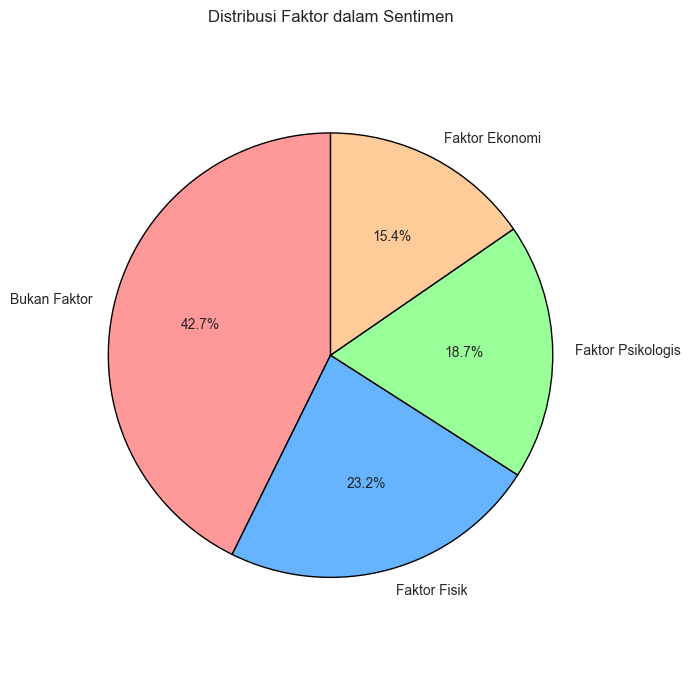

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan DataFrame df sudah tersedia dari proses sebelumnya

# Menghitung jumlah masing-masing kategori dalam kolom 'sentiment'
sentiment_counts = df['sentiment'].value_counts()

# Membuat plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Faktor dalam Sentimen')
plt.axis('equal')  # Agar pie chart terlihat bulat
plt.tight_layout()  # Untuk memperbaiki layout agar tidak terpotong
plt.show()

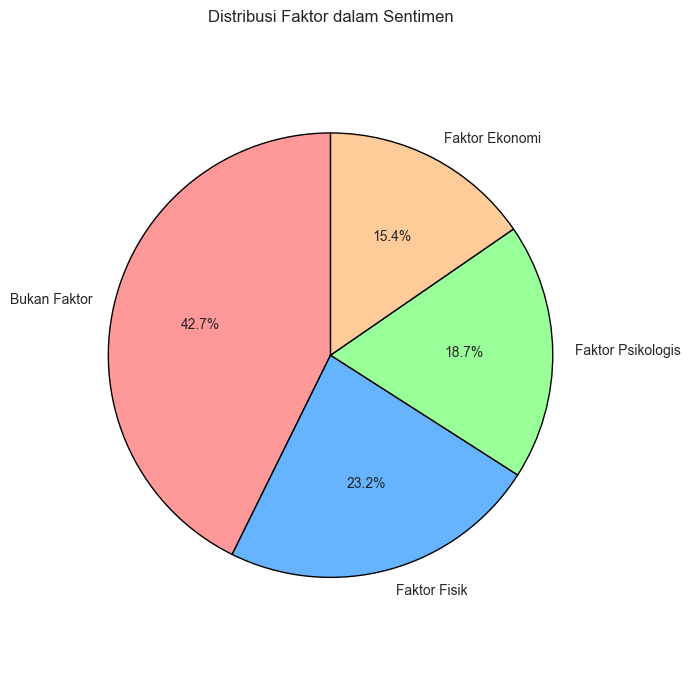

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan DataFrame df sudah tersedia dari proses sebelumnya

# Menghitung jumlah masing-masing kategori dalam kolom 'sentiment'
sentiment_counts = df['sentiment'].value_counts()

# Membuat plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Faktor dalam Sentimen')
plt.axis('equal')  # Agar pie chart terlihat bulat
plt.tight_layout()  # Untuk memperbaiki layout agar tidak terpotong
plt.show()

In [7]:
!pip install seaborn

Train size: 704
Validation size: 151
Test size: 152


C:\Users\sanyd\AppData\Local\Temp\ipykernel_16720\2175789518.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


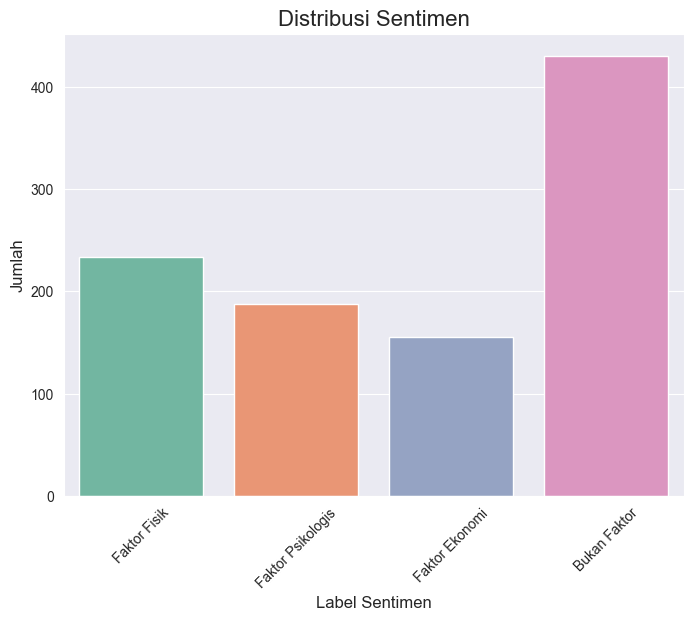

C:\Users\sanyd\AppData\Local\Temp\ipykernel_16720\2175789518.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_labels, palette='Set2')


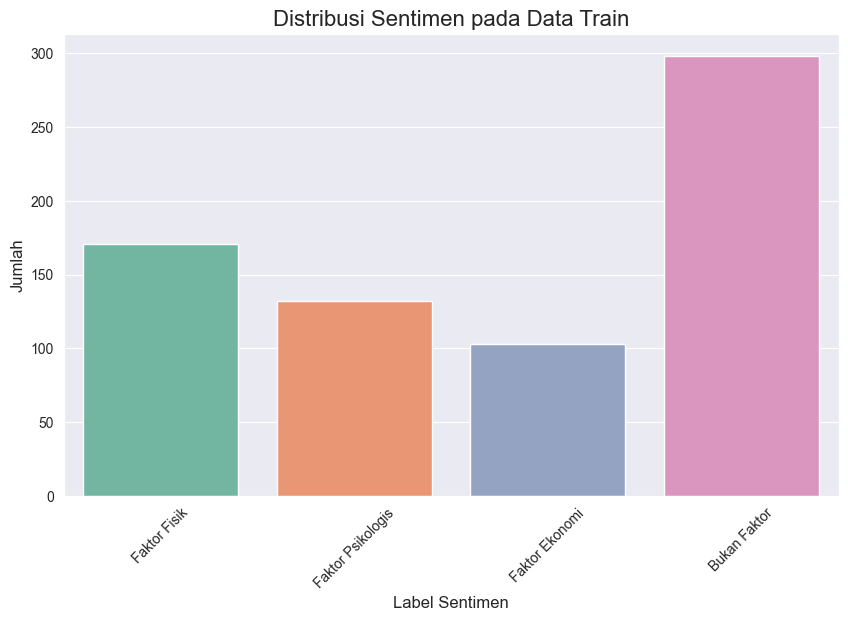

C:\Users\sanyd\AppData\Local\Temp\ipykernel_16720\2175789518.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=val_labels, palette='Set2')


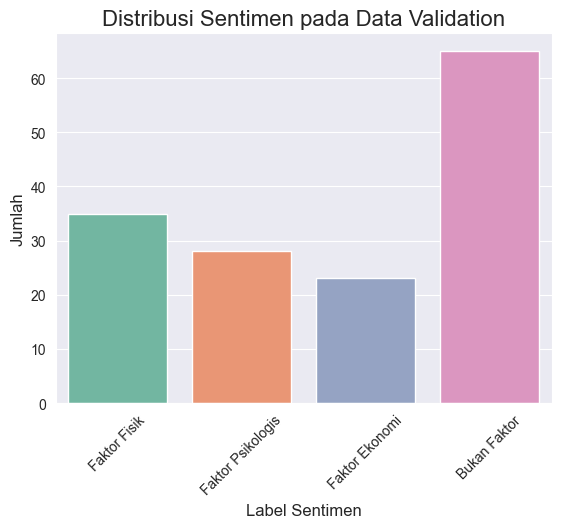

C:\Users\sanyd\AppData\Local\Temp\ipykernel_16720\2175789518.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test_labels, palette='Set2')


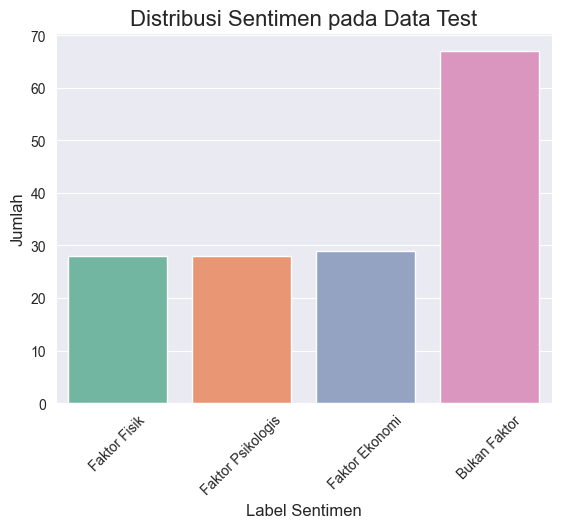

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Membaca dataset hasil analisis (pastikan Anda mengganti dengan path yang benar)
df = pd.read_csv("hasil_analisis_fuzzy.csv")

# Mapping kategori sentimen ke label numerik
label_map = {"Faktor Fisik": 0, "Faktor Psikologis": 1, "Faktor Ekonomi": 2, "Bukan Faktor": 3}
df['label'] = df['sentiment'].map(label_map)

# Membagi dataset menjadi train, validation, dan test (70%, 15%, 15%)
train_texts, temp_texts, train_labels, temp_labels = train_test_split(df['stemmed_tokens'], df['label'], test_size=0.3, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

# Menampilkan dimensi dataset
print(f"Train size: {len(train_texts)}")
print(f"Validation size: {len(val_texts)}")
print(f"Test size: {len(test_texts)}")

# Visualisasi distribusi sentimen di seluruh dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribusi Sentimen', fontsize=16)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Faktor Fisik", "Faktor Psikologis", "Faktor Ekonomi", "Bukan Faktor"], rotation=45)
plt.show()

# Menampilkan distribusi label dalam train, validation, dan test set
plt.figure(figsize=(10, 6))

# Data distribusi label di setiap subset (train set)
sns.countplot(x=train_labels, palette='Set2')
plt.title('Distribusi Sentimen pada Data Train', fontsize=16)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Faktor Fisik", "Faktor Psikologis", "Faktor Ekonomi", "Bukan Faktor"], rotation=45)
plt.show()

# Data distribusi label di setiap subset (validation set)
sns.countplot(x=val_labels, palette='Set2')
plt.title('Distribusi Sentimen pada Data Validation', fontsize=16)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Faktor Fisik", "Faktor Psikologis", "Faktor Ekonomi", "Bukan Faktor"], rotation=45)
plt.show()

# Data distribusi label di setiap subset (test set)
sns.countplot(x=test_labels, palette='Set2')
plt.title('Distribusi Sentimen pada Data Test', fontsize=16)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Faktor Fisik", "Faktor Psikologis", "Faktor Ekonomi", "Bukan Faktor"], rotation=45)
plt.show()

In [21]:
!pip install huggingface-hub -U
!pip install transformers -U

  Using cached huggingface_hub-0.27.0-py3-none-any.whl.metadata (13 kB)
Using cached huggingface_hub-0.27.0-py3-none-any.whl (450 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.23.4
    Uninstalling huggingface-hub-0.23.4:
      Successfully uninstalled huggingface-hub-0.23.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nlp-id 0.1.18.0 requires huggingface-hub==0.23.4, but you have huggingface-hub 0.27.0 which is incompatible.


In [8]:
from transformers import BertTokenizer

# Load tokenizer dari pre-trained model
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p2')

# View vocabulary from pre-trained models that have been preloaded
vocabulary = bert_tokenizer.get_vocab()
print('Panjang vocabulary:', len(vocabulary))

# Menampilkan beberapa kata dari vocabulary
print("Contoh beberapa kata dalam vocabulary:", list(vocabulary.items())[:10])

# Contoh Tokenization
sample_review = df_analisis['stemmed_tokens'][0]
print('Kalimat:', sample_review)
print('BERT Tokenizer:', bert_tokenizer.tokenize(sample_review))

# Input formatting untuk BERT menggunakan 'encode_plus'
bert_input = bert_tokenizer.encode_plus(
    sample_review,  # Kalimat yang akan diproses
    add_special_tokens=True,  # Menambahkan [CLS] di awal kalimat dan [SEP] di akhir
    padding='max_length',  # Padding ke max_length jika kalimat lebih pendek dari max_length
    truncation='longest_first',  # Pemotongan kalimat jika lebih panjang dari max_length
    max_length=50,  # Panjang maksimum kalimat yang akan diproses
    return_attention_mask=True,  # Mengembalikan attention mask
    return_token_type_ids=True  # Mengembalikan token type ids
)

# Mengecek hasil encode_plus
print("\nHasil 'encode_plus':")
print(f"Kalimat asli: {sample_review}")
print(f"Tokenizer Output (Tokenized): {bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids'])}")
print(f"Input IDs (Token Indexes): {bert_input['input_ids']}")
print(f"Token Type IDs: {bert_input['token_type_ids']}")
print(f"Attention Mask: {bert_input['attention_mask']}")

Panjang vocabulary: 30521
Contoh beberapa kata dalam vocabulary: [('[PAD]', 0), ('[UNK]', 1), ('[CLS]', 2), ('[SEP]', 3), ('[MASK]', 4), ('##an', 5), ('d', 6), ('##er', 7), ('m', 8), ('##en', 9)]
Kalimat: ['mie', 'gacoan', 'masuk', 'gofood', 'anjay', 'allah', 'bahagia']
BERT Tokenizer: ['[', "'", 'mie', "'", ',', "'", 'ga', '##co', '##an', "'", ',', "'", 'masuk', "'", ',', "'", 'go', '##food', "'", ',', "'", 'anj', '##ay', "'", ',', "'", 'allah', "'", ',', "'", 'bahagia', "'", ']']

Hasil 'encode_plus':
Kalimat asli: ['mie', 'gacoan', 'masuk', 'gofood', 'anjay', 'allah', 'bahagia']
Tokenizer Output (Tokenized): ['[CLS]', '[', "'", 'mie', "'", ',', "'", 'ga', '##co', '##an', "'", ',', "'", 'masuk', "'", ',', "'", 'go', '##food', "'", ',', "'", 'anj', '##ay', "'", ',', "'", 'allah', "'", ',', "'", 'bahagia', "'", ']', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs (Token Indexes): [

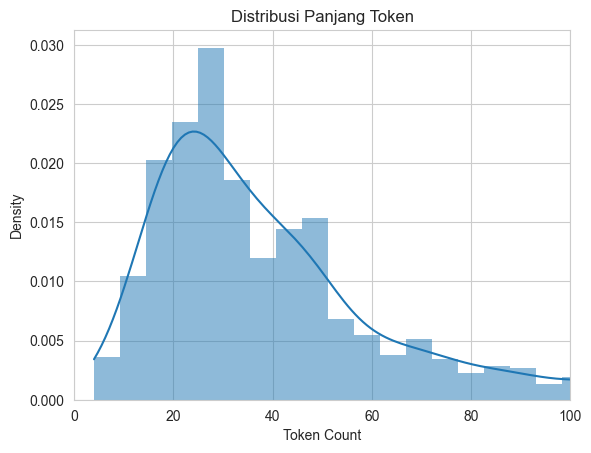

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan panjang maksimum berdasarkan distribusi token di dataset
token_lens = []
for txt in df_analisis['stemmed_tokens']:
    tokens = bert_tokenizer.encode(txt)  # Tokenisasi kalimat
    token_lens.append(len(tokens))  # Menyimpan panjang token untuk setiap kalimat

# Membuat histogram untuk distribusi panjang token
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100])  # Membatasi sumbu X dari 0 hingga 100 token
plt.xlabel('Token Count')  # Memberikan label pada sumbu X
plt.ylabel('Density')  # Memberikan label pada sumbu Y
plt.title('Distribusi Panjang Token')  # Memberikan judul pada grafik
plt.show()

In [25]:
!pip install --upgrade transformers huggingface-hub

In [5]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load tokenizer IndoBERT
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

# Konfigurasi perangkat (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Definisikan mapping label faktor
label_mapping = {
    "Faktor Fisik": 0,
    "Faktor Psikologis": 1,
    "Faktor Ekonomi": 2,
    "Bukan Faktor": 3
}
print("Label Mapping:")
for label, idx in label_mapping.items():
    print(f"{label}: {idx}")

# Fungsi untuk menambahkan token khusus dan format input untuk model BERT
def convert_example_to_feature(sentence, max_length=128):
    encoded = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,  # Menambahkan [CLS] di awal kalimat dan [SEP] di akhir
        padding='max_length',  # Padding ke max_length jika kalimat lebih pendek dari max_length
        truncation='longest_first',  # Pemotongan kalimat jika lebih panjang dari max_length
        max_length=max_length,  # Panjang maksimum kalimat yang akan diproses
        return_attention_mask=True,  # Mengembalikan attention mask
        return_token_type_ids=True  # Mengembalikan token type ids
    )
    return encoded

# Dataset custom untuk IndoBERT
class IndoBERTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenisasi dan format input menggunakan fungsi convert_example_to_feature
        features = convert_example_to_feature(text, max_length=self.max_length)

        return {
            "input_ids": torch.tensor(features["input_ids"], dtype=torch.long),
            "attention_mask": torch.tensor(features["attention_mask"], dtype=torch.long),
            "token_type_ids": torch.tensor(features["token_type_ids"], dtype=torch.long),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Membagi dataset menjadi train, validation, dan test
texts = df_analisis['stemmed_tokens'].tolist()
sentiments = df_analisis['sentiment'].map(label_mapping).tolist()

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, sentiments, test_size=0.3, random_state=42
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42
)

# Membuat dataset untuk DataLoader
train_dataset = IndoBERTDataset(train_texts, train_labels, tokenizer)
val_dataset = IndoBERTDataset(val_texts, val_labels, tokenizer)
test_dataset = IndoBERTDataset(test_texts, test_labels, tokenizer)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Load model IndoBERT dengan konfigurasi dropout
config = BertConfig.from_pretrained("indobenchmark/indobert-base-p2", num_labels=4, hidden_dropout_prob=0.3)
model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", config=config)
model.to(device)

# Menampilkan arsitektur model
print("\nIndoBERT Model Architecture:")
print(model)

# Jumlah parameter
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")

# Fungsi untuk melatih model tanpa optimizer
def train_epoch_no_optimizer(model, data_loader, device, lr=2e-5):
    model.train()
    losses = []
    correct_predictions = 0

    for batch_idx, batch in enumerate(data_loader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)

        # Forward pass
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            labels=labels
        )
        loss = outputs.loss
        logits = outputs.logits

        # Backward pass
        loss.backward()

        # Update weights manually (tanpa optimizer)
        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
                param.grad = None  # Reset gradien setelah update

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Fungsi evaluasi model
def eval_model(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    losses = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            token_type_ids = batch["token_type_ids"].to(device)
            labels = batch["label"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                labels=labels
            )
            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Variabel untuk menyimpan akurasi dan loss selama training dan validation
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Training loop
EPOCHS = 10
best_val_acc = 0
patience = 5
patience_counter = 0

for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")

    # Training
    train_acc, train_loss = train_epoch_no_optimizer(model, train_loader, device)

    # Validation
    val_acc, val_loss = eval_model(model, val_loader, device)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Simpan metrik untuk visualisasi
    train_accuracies.append(train_acc.cpu().numpy())
    train_losses.append(train_loss)
    val_accuracies.append(val_acc.cpu().numpy())
    val_losses.append(val_loss)

    # Early stopping
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        model.save_pretrained("best_indobert_model_no_optimizer")
        tokenizer.save_pretrained("best_indobert_model_no_optimizer")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

# Evaluasi akhir pada data test
model = BertForSequenceClassification.from_pretrained("best_indobert_model_no_optimizer")
model.to(device)
test_acc, _ = eval_model(model, test_loader, device)  # Evaluasi hanya akurasi

print(f"Test Accuracy: {test_acc:.4f}")

# Visualisasi Training Accuracy, Validation Accuracy, dan Test Accuracy
plt.figure(figsize=(10, 6))

# Plot Training Accuracy dan Validation Accuracy
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", marker='s', color='green')

# Tambahkan garis horizontal untuk Test Accuracy
plt.axhline(y=test_acc.cpu().numpy(), color='red', linestyle='--', label="Test Accuracy")

# Penyesuaian grafik
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training, Validation, and Test Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()

Using device: cuda
Label Mapping:
Faktor Fisik: 0
Faktor Psikologis: 1
Faktor Ekonomi: 2
Bukan Faktor: 3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



IndoBERT Model Architecture:
BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

KeyboardInterrupt: 

Using device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
Train Loss: 1.3888, Train Accuracy: 0.3338
Validation Loss: 1.3883, Validation Accuracy: 0.2517
Epoch 2/10
Train Loss: 1.3959, Train Accuracy: 0.3182
Validation Loss: 1.3885, Validation Accuracy: 0.2914
Epoch 3/10
Train Loss: 1.3960, Train Accuracy: 0.3139
Validation Loss: 1.3796, Validation Accuracy: 0.3510
Epoch 4/10
Train Loss: 1.3974, Train Accuracy: 0.3125
Validation Loss: 1.3686, Validation Accuracy: 0.3907
Epoch 5/10
Train Loss: 1.3864, Train Accuracy: 0.3310
Validation Loss: 1.3559, Validation Accuracy: 0.4305
Epoch 6/10
Train Loss: 1.3631, Train Accuracy: 0.3466
Validation Loss: 1.3495, Validation Accuracy: 0.4305
Epoch 7/10
Train Loss: 1.3594, Train Accuracy: 0.3565
Validation Loss: 1.3419, Validation Accuracy: 0.4305
Epoch 8/10
Train Loss: 1.3640, Train Accuracy: 0.3622
Validation Loss: 1.3342, Validation Accuracy: 0.4305
Early stopping triggered!
Test Accuracy: 0.4211


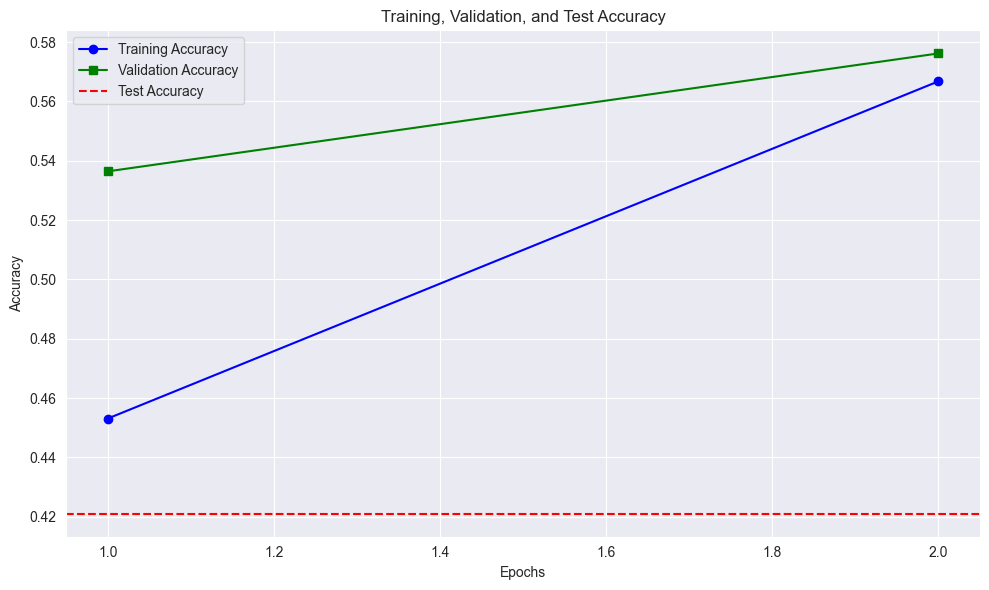

In [4]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
import numpy as np
import matplotlib.pyplot as plt

# Load tokenizer IndoBERT
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

# Konfigurasi perangkat (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Definisikan mapping label faktor
label_mapping = {
    "Faktor Fisik": 0,
    "Faktor Psikologis": 1,
    "Faktor Ekonomi": 2,
    "Bukan Faktor": 3
}
print("Label Mapping:")
for label, idx in label_mapping.items():
    print(f"{label}: {idx}")

# Fungsi untuk menambahkan token khusus dan format input untuk model BERT
def convert_example_to_feature(sentence, max_length=128):
    encoded = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_attention_mask=True,
        return_token_type_ids=True
    )
    return encoded

# Dataset custom untuk IndoBERT
class IndoBERTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenisasi dan format input menggunakan fungsi convert_example_to_feature
        features = convert_example_to_feature(text, max_length=self.max_length)

        return {
            "input_ids": torch.tensor(features["input_ids"], dtype=torch.long),
            "attention_mask": torch.tensor(features["attention_mask"], dtype=torch.long),
            "token_type_ids": torch.tensor(features["token_type_ids"], dtype=torch.long),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Membagi dataset menjadi train, validation, dan test
texts = df_analisis['stemmed_tokens'].tolist()
sentiments = df_analisis['sentiment'].map(label_mapping).tolist()

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, sentiments, test_size=0.3, random_state=42
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42
)

# Membuat dataset untuk DataLoader
train_dataset = IndoBERTDataset(train_texts, train_labels, tokenizer)
val_dataset = IndoBERTDataset(val_texts, val_labels, tokenizer)
test_dataset = IndoBERTDataset(test_texts, test_labels, tokenizer)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Load model IndoBERT dengan konfigurasi dropout
config = BertConfig.from_pretrained("indobenchmark/indobert-base-p2", num_labels=4, hidden_dropout_prob=0.3)
model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", config=config)
model.to(device)

# Menampilkan arsitektur model
print("\nIndoBERT Model Architecture:")
print(model)

# Jumlah parameter
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")

# Optimizer AdamW
optimizer = AdamW(model.parameters(), lr=2e-5)

# Fungsi untuk melatih model
def train_epoch(model, data_loader, optimizer, device):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in data_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            labels=labels
        )
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Fungsi evaluasi model
def eval_model(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    losses = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            token_type_ids = batch["token_type_ids"].to(device)
            labels = batch["label"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                labels=labels
            )
            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Variabel untuk menyimpan akurasi dan loss selama training dan validation
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Training loop
EPOCHS = 10
best_val_acc = 0
patience = 5
patience_counter = 0

for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")

    # Training
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, device)

    # Validation
    val_acc, val_loss = eval_model(model, val_loader, device)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Simpan metrik untuk visualisasi
    train_accuracies.append(train_acc.cpu().numpy())
    train_losses.append(train_loss)
    val_accuracies.append(val_acc.cpu().numpy())
    val_losses.append(val_loss)

    # Early stopping
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        model.save_pretrained("best_indobert_model_adamw")
        tokenizer.save_pretrained("best_indobert_model_adamw")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

# Evaluasi akhir pada data test
model = BertForSequenceClassification.from_pretrained("best_indobert_model_adamw")
model.to(device)
test_acc, _ = eval_model(model, test_loader, device)  # Evaluasi hanya akurasi

print(f"Test Accuracy: {test_acc:.4f}")

# Visualisasi Training Accuracy, Validation Accuracy, dan Test Accuracy
plt.figure(figsize=(10, 6))

# Plot Training Accuracy dan Validation Accuracy
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", marker='s', color='green')

# Tambahkan garis horizontal untuk Test Accuracy
plt.axhline(y=test_acc.cpu().numpy(), color='red', linestyle='--', label="Test Accuracy")

# Penyesuaian grafik
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training, Validation, and Test Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()

In [1]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
import numpy as np
import matplotlib.pyplot as plt

# Load tokenizer IndoBERT
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

# Konfigurasi perangkat (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Definisikan mapping label faktor
label_mapping = {
    "Faktor Fisik": 0,
    "Faktor Psikologis": 1,
    "Faktor Ekonomi": 2,
    "Bukan Faktor": 3
}
print("Label Mapping:")
for label, idx in label_mapping.items():
    print(f"{label}: {idx}")

# Fungsi untuk menambahkan token khusus dan format input untuk model BERT
def convert_example_to_feature(sentence, max_length=128):
    encoded = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_attention_mask=True,
        return_token_type_ids=True
    )
    return encoded

# Dataset custom untuk IndoBERT
class IndoBERTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenisasi dan format input menggunakan fungsi convert_example_to_feature
        features = convert_example_to_feature(text, max_length=self.max_length)

        return {
            "input_ids": torch.tensor(features["input_ids"], dtype=torch.long),
            "attention_mask": torch.tensor(features["attention_mask"], dtype=torch.long),
            "token_type_ids": torch.tensor(features["token_type_ids"], dtype=torch.long),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Membagi dataset menjadi train, validation, dan test
texts = df_analisis['stemmed_tokens'].tolist()
sentiments = df_analisis['sentiment'].map(label_mapping).tolist()

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, sentiments, test_size=0.3, random_state=42
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42
)

# Membuat dataset untuk DataLoader
train_dataset = IndoBERTDataset(train_texts, train_labels, tokenizer)
val_dataset = IndoBERTDataset(val_texts, val_labels, tokenizer)
test_dataset = IndoBERTDataset(test_texts, test_labels, tokenizer)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Load model IndoBERT dengan konfigurasi dropout
config = BertConfig.from_pretrained("indobenchmark/indobert-base-p2", num_labels=4, hidden_dropout_prob=0.3)
model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", config=config)
model.to(device)

# Menampilkan arsitektur model
print("\nIndoBERT Model Architecture:")
print(model)

# Jumlah parameter
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")

# Optimizer Adam (tanpa weight decay)
optimizer = Adam(model.parameters(), lr=2e-5)

# Fungsi untuk melatih model
def train_epoch(model, data_loader, optimizer, device):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in data_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            labels=labels
        )
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Fungsi evaluasi model
def eval_model(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    losses = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            token_type_ids = batch["token_type_ids"].to(device)
            labels = batch["label"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                labels=labels
            )
            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Variabel untuk menyimpan akurasi dan loss selama training dan validation
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Training loop
EPOCHS = 10
best_val_acc = 0
patience = 5
patience_counter = 0

for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")

    # Training
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, device)

    # Validation
    val_acc, val_loss = eval_model(model, val_loader, device)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Simpan metrik untuk visualisasi
    train_accuracies.append(train_acc.cpu().numpy())
    train_losses.append(train_loss)
    val_accuracies.append(val_acc.cpu().numpy())
    val_losses.append(val_loss)

    # Early stopping
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        model.save_pretrained("best_indobert_model_adam")
        tokenizer.save_pretrained("best_indobert_model_adam")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

# Evaluasi akhir pada data test
model = BertForSequenceClassification.from_pretrained("best_indobert_model_adam")
model.to(device)
test_acc, _ = eval_model(model, test_loader, device)  # Evaluasi hanya akurasi

print(f"Test Accuracy: {test_acc:.4f}")

# Visualisasi Training Accuracy, Validation Accuracy, dan Test Accuracy
plt.figure(figsize=(10, 6))

# Plot Training Accuracy dan Validation Accuracy
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", marker='s', color='green')

# Tambahkan garis horizontal untuk Test Accuracy
plt.axhline(y=test_acc.cpu().numpy(), color='red', linestyle='--', label="Test Accuracy")

# Penyesuaian grafik
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training, Validation, and Test Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()

NameError: name 'df_analisis' is not defined

In [5]:
!pip install torch-optimizer

Using device: cuda
Label Mapping:
Faktor Fisik: 0
Faktor Psikologis: 1
Faktor Ekonomi: 2
Bukan Faktor: 3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



IndoBERT Model Architecture:
BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

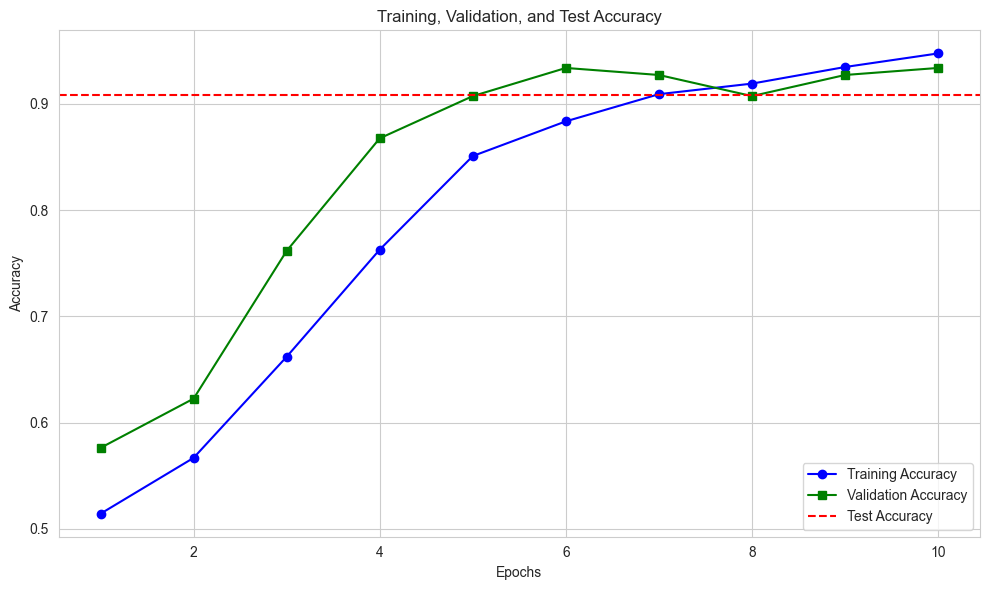

In [6]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import torch_optimizer as optim  # Mengimpor torch_optimizer untuk RAdam
from torch.nn import CrossEntropyLoss
import numpy as np
import matplotlib.pyplot as plt

# Load tokenizer IndoBERT
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

# Konfigurasi perangkat (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Definisikan mapping label faktor
label_mapping = {
    "Faktor Fisik": 0,
    "Faktor Psikologis": 1,
    "Faktor Ekonomi": 2,
    "Bukan Faktor": 3
}
print("Label Mapping:")
for label, idx in label_mapping.items():
    print(f"{label}: {idx}")

# Fungsi untuk menambahkan token khusus dan format input untuk model BERT
def convert_example_to_feature(sentence, max_length=128):
    encoded = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_attention_mask=True,
        return_token_type_ids=True
    )
    return encoded

# Dataset custom untuk IndoBERT
class IndoBERTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenisasi dan format input menggunakan fungsi convert_example_to_feature
        features = convert_example_to_feature(text, max_length=self.max_length)

        return {
            "input_ids": torch.tensor(features["input_ids"], dtype=torch.long),
            "attention_mask": torch.tensor(features["attention_mask"], dtype=torch.long),
            "token_type_ids": torch.tensor(features["token_type_ids"], dtype=torch.long),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Membagi dataset menjadi train, validation, dan test
texts = df_analisis['stemmed_tokens'].tolist()
sentiments = df_analisis['sentiment'].map(label_mapping).tolist()

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, sentiments, test_size=0.3, random_state=42
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42
)

# Membuat dataset untuk DataLoader
train_dataset = IndoBERTDataset(train_texts, train_labels, tokenizer)
val_dataset = IndoBERTDataset(val_texts, val_labels, tokenizer)
test_dataset = IndoBERTDataset(test_texts, test_labels, tokenizer)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Load model IndoBERT dengan konfigurasi dropout
config = BertConfig.from_pretrained("indobenchmark/indobert-base-p2", num_labels=4, hidden_dropout_prob=0.3)
model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", config=config)
model.to(device)

# Menampilkan arsitektur model
print("\nIndoBERT Model Architecture:")
print(model)

# Jumlah parameter
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")

# Optimizer RAdam
optimizer = optim.RAdam(model.parameters(), lr=2e-5)

# Fungsi untuk melatih model
def train_epoch(model, data_loader, optimizer, device):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in data_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            labels=labels
        )
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Fungsi evaluasi model
def eval_model(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    losses = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            token_type_ids = batch["token_type_ids"].to(device)
            labels = batch["label"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                labels=labels
            )
            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Variabel untuk menyimpan akurasi dan loss selama training dan validation
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Training loop
EPOCHS = 10
best_val_acc = 0
patience = 5
patience_counter = 0

for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")

    # Training
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, device)

    # Validation
    val_acc, val_loss = eval_model(model, val_loader, device)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Simpan metrik untuk visualisasi
    train_accuracies.append(train_acc.cpu().numpy())
    train_losses.append(train_loss)
    val_accuracies.append(val_acc.cpu().numpy())
    val_losses.append(val_loss)

    # Early stopping
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        model.save_pretrained("best_indobert_model_radam")
        tokenizer.save_pretrained("best_indobert_model_radam")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

# Evaluasi akhir pada data test
model = BertForSequenceClassification.from_pretrained("best_indobert_model_radam")
model.to(device)
test_acc, _ = eval_model(model, test_loader, device)  # Evaluasi hanya akurasi

print(f"Test Accuracy: {test_acc:.4f}")

# Visualisasi Training Accuracy, Validation Accuracy, dan Test Accuracy
plt.figure(figsize=(10, 6))

# Plot Training Accuracy dan Validation Accuracy
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", marker='s', color='green')

# Tambahkan garis horizontal untuk Test Accuracy
plt.axhline(y=test_acc.cpu().numpy(), color='red', linestyle='--', label="Test Accuracy")

# Penyesuaian grafik
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training, Validation, and Test Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()

Using device: cuda
Label Mapping:
Faktor Fisik: 0
Faktor Psikologis: 1
Faktor Ekonomi: 2
Bukan Faktor: 3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



IndoBERT Model Architecture:
BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

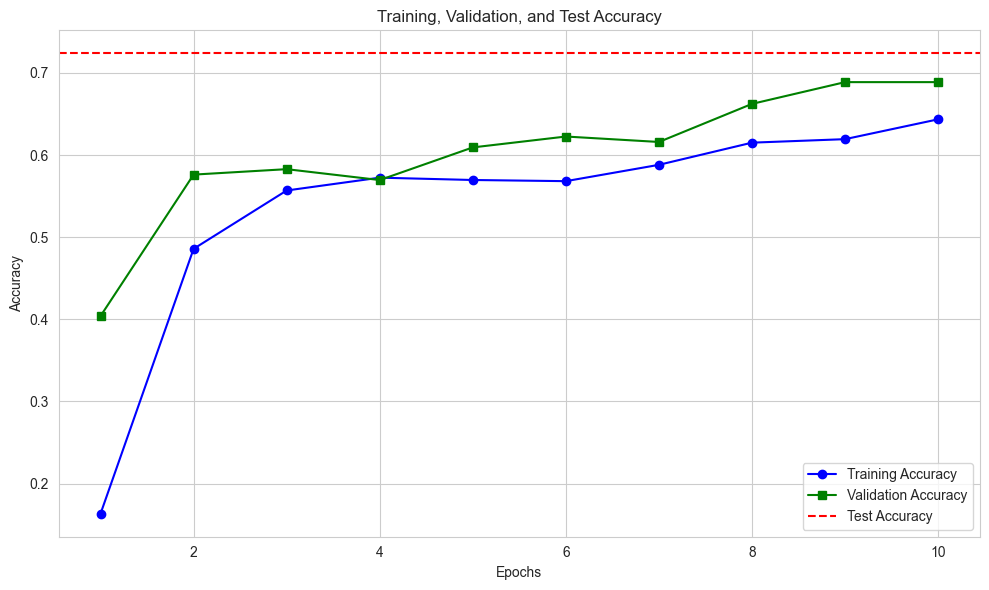

In [7]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import torch_optimizer as optim  # Mengimpor torch_optimizer untuk Lamb
from torch.nn import CrossEntropyLoss
import numpy as np
import matplotlib.pyplot as plt

# Load tokenizer IndoBERT
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

# Konfigurasi perangkat (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Definisikan mapping label faktor
label_mapping = {
    "Faktor Fisik": 0,
    "Faktor Psikologis": 1,
    "Faktor Ekonomi": 2,
    "Bukan Faktor": 3
}
print("Label Mapping:")
for label, idx in label_mapping.items():
    print(f"{label}: {idx}")

# Fungsi untuk menambahkan token khusus dan format input untuk model BERT
def convert_example_to_feature(sentence, max_length=128):
    encoded = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_attention_mask=True,
        return_token_type_ids=True
    )
    return encoded

# Dataset custom untuk IndoBERT
class IndoBERTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenisasi dan format input menggunakan fungsi convert_example_to_feature
        features = convert_example_to_feature(text, max_length=self.max_length)

        return {
            "input_ids": torch.tensor(features["input_ids"], dtype=torch.long),
            "attention_mask": torch.tensor(features["attention_mask"], dtype=torch.long),
            "token_type_ids": torch.tensor(features["token_type_ids"], dtype=torch.long),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Membagi dataset menjadi train, validation, dan test
texts = df_analisis['stemmed_tokens'].tolist()
sentiments = df_analisis['sentiment'].map(label_mapping).tolist()

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, sentiments, test_size=0.3, random_state=42
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42
)

# Membuat dataset untuk DataLoader
train_dataset = IndoBERTDataset(train_texts, train_labels, tokenizer)
val_dataset = IndoBERTDataset(val_texts, val_labels, tokenizer)
test_dataset = IndoBERTDataset(test_texts, test_labels, tokenizer)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Load model IndoBERT dengan konfigurasi dropout
config = BertConfig.from_pretrained("indobenchmark/indobert-base-p2", num_labels=4, hidden_dropout_prob=0.3)
model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", config=config)
model.to(device)

# Menampilkan arsitektur model
print("\nIndoBERT Model Architecture:")
print(model)

# Jumlah parameter
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")

# Optimizer Lamb
optimizer = optim.Lamb(model.parameters(), lr=2e-5)

# Fungsi untuk melatih model
def train_epoch(model, data_loader, optimizer, device):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in data_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            labels=labels
        )
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Fungsi evaluasi model
def eval_model(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    losses = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            token_type_ids = batch["token_type_ids"].to(device)
            labels = batch["label"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                labels=labels
            )
            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Variabel untuk menyimpan akurasi dan loss selama training dan validation
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Training loop
EPOCHS = 10
best_val_acc = 0
patience = 5
patience_counter = 0

for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")

    # Training
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, device)

    # Validation
    val_acc, val_loss = eval_model(model, val_loader, device)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Simpan metrik untuk visualisasi
    train_accuracies.append(train_acc.cpu().numpy())
    train_losses.append(train_loss)
    val_accuracies.append(val_acc.cpu().numpy())
    val_losses.append(val_loss)

    # Early stopping
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        model.save_pretrained("best_indobert_model_lamb")
        tokenizer.save_pretrained("best_indobert_model_lamb")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

# Evaluasi akhir pada data test
model = BertForSequenceClassification.from_pretrained("best_indobert_model_lamb")
model.to(device)
test_acc, _ = eval_model(model, test_loader, device)  # Evaluasi hanya akurasi

print(f"Test Accuracy: {test_acc:.4f}")

# Visualisasi Training Accuracy, Validation Accuracy, dan Test Accuracy
plt.figure(figsize=(10, 6))

# Plot Training Accuracy dan Validation Accuracy
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", marker='s', color='green')

# Tambahkan garis horizontal untuk Test Accuracy
plt.axhline(y=test_acc.cpu().numpy(), color='red', linestyle='--', label="Test Accuracy")

# Penyesuaian grafik
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training, Validation, and Test Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()

Using device: cuda
Label Mapping:
Faktor Fisik: 0
Faktor Psikologis: 1
Faktor Ekonomi: 2
Bukan Faktor: 3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



IndoBERT Model Architecture:
BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

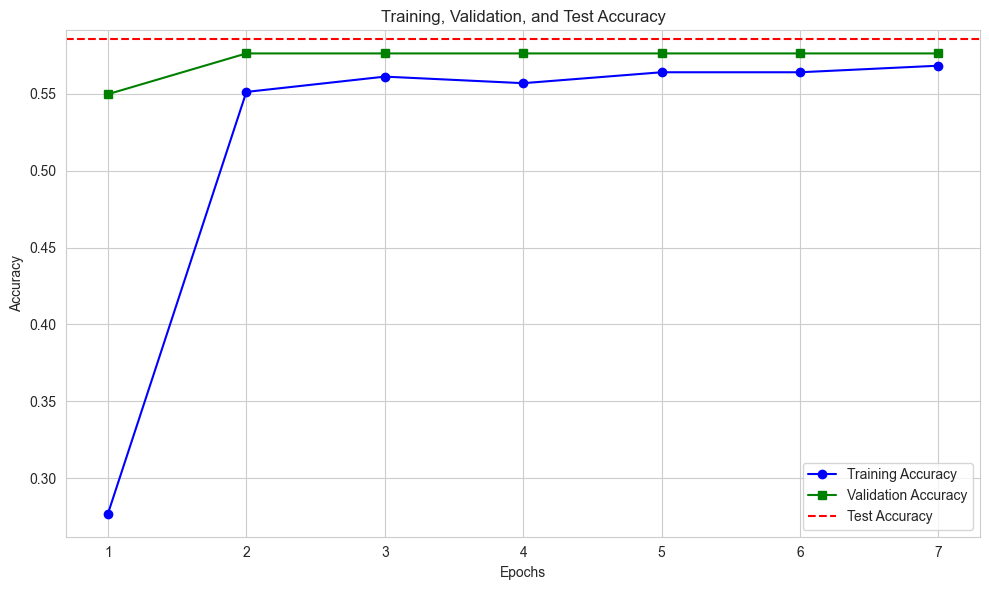

In [8]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import torch
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
import numpy as np
import matplotlib.pyplot as plt

# Load tokenizer IndoBERT
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

# Konfigurasi perangkat (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Definisikan mapping label faktor
label_mapping = {
    "Faktor Fisik": 0,
    "Faktor Psikologis": 1,
    "Faktor Ekonomi": 2,
    "Bukan Faktor": 3
}
print("Label Mapping:")
for label, idx in label_mapping.items():
    print(f"{label}: {idx}")

# Fungsi untuk menambahkan token khusus dan format input untuk model BERT
def convert_example_to_feature(sentence, max_length=128):
    encoded = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_attention_mask=True,
        return_token_type_ids=True
    )
    return encoded

# Dataset custom untuk IndoBERT
class IndoBERTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenisasi dan format input menggunakan fungsi convert_example_to_feature
        features = convert_example_to_feature(text, max_length=self.max_length)

        return {
            "input_ids": torch.tensor(features["input_ids"], dtype=torch.long),
            "attention_mask": torch.tensor(features["attention_mask"], dtype=torch.long),
            "token_type_ids": torch.tensor(features["token_type_ids"], dtype=torch.long),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Membagi dataset menjadi train, validation, dan test
texts = df_analisis['stemmed_tokens'].tolist()
sentiments = df_analisis['sentiment'].map(label_mapping).tolist()

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, sentiments, test_size=0.3, random_state=42
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42
)

# Membuat dataset untuk DataLoader
train_dataset = IndoBERTDataset(train_texts, train_labels, tokenizer)
val_dataset = IndoBERTDataset(val_texts, val_labels, tokenizer)
test_dataset = IndoBERTDataset(test_texts, test_labels, tokenizer)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Load model IndoBERT dengan konfigurasi dropout
config = BertConfig.from_pretrained("indobenchmark/indobert-base-p2", num_labels=4, hidden_dropout_prob=0.3)
model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", config=config)
model.to(device)

# Menampilkan arsitektur model
print("\nIndoBERT Model Architecture:")
print(model)

# Jumlah parameter
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")

# Optimizer SGD dengan Momentum
optimizer = SGD(model.parameters(), lr=2e-5, momentum=0.9)

# Fungsi untuk melatih model
def train_epoch(model, data_loader, optimizer, device):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in data_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            labels=labels
        )
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Fungsi evaluasi model
def eval_model(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    losses = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            token_type_ids = batch["token_type_ids"].to(device)
            labels = batch["label"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                labels=labels
            )
            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Variabel untuk menyimpan akurasi dan loss selama training dan validation
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Training loop
EPOCHS = 10
best_val_acc = 0
patience = 5
patience_counter = 0

for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")

    # Training
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, device)

    # Validation
    val_acc, val_loss = eval_model(model, val_loader, device)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Simpan metrik untuk visualisasi
    train_accuracies.append(train_acc.cpu().numpy())
    train_losses.append(train_loss)
    val_accuracies.append(val_acc.cpu().numpy())
    val_losses.append(val_loss)

    # Early stopping
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        model.save_pretrained("best_indobert_model_sgd_momentum")
        tokenizer.save_pretrained("best_indobert_model_sgd_momentum")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

# Evaluasi akhir pada data test
model = BertForSequenceClassification.from_pretrained("best_indobert_model_sgd_momentum")
model.to(device)
test_acc, _ = eval_model(model, test_loader, device)  # Evaluasi hanya akurasi

print(f"Test Accuracy: {test_acc:.4f}")

# Visualisasi Training Accuracy, Validation Accuracy, dan Test Accuracy
plt.figure(figsize=(10, 6))

# Plot Training Accuracy dan Validation Accuracy
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", marker='s', color='green')

# Tambahkan garis horizontal untuk Test Accuracy
plt.axhline(y=test_acc.cpu().numpy(), color='red', linestyle='--', label="Test Accuracy")

# Penyesuaian grafik
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training, Validation, and Test Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()

In [1]:
import torch
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    f1_score, 
    precision_score, 
    recall_score, 
    accuracy_score
)
import matplotlib.pyplot as plt
import numpy as np

# Fungsi evaluasi dengan classification report dan confusion matrix
def eval_model_with_metrics(model, data_loader, device):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    return y_true, y_pred

# Evaluasi akhir pada data test
model = BertForSequenceClassification.from_pretrained("best_indobert_model_adamw")
model.to(device)

# Mendapatkan label sebenarnya dan prediksi model
y_true, y_pred = eval_model_with_metrics(model, test_loader, device)

# Classification Report
report = classification_report(y_true, y_pred, target_names=["Faktor Fisik", "Faktor Psikologis", "Faktor Ekonomi", "Bukan Faktor"])
print("Classification Report:\n", report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Menampilkan Confusion Matrix dengan ukuran diperbesar
fig, ax = plt.subplots(figsize=(6, 6))  # Ubah ukuran grafik di sini
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Faktor Fisik", "Faktor Psikologis", "Faktor Ekonomi", "Bukan Faktor"])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.show()

# Menghitung metrik makro dan weighted
f1_weighted = f1_score(y_true, y_pred, average="weighted")
precision_weighted = precision_score(y_true, y_pred, average="weighted")
recall_weighted = recall_score(y_true, y_pred, average="weighted")
accuracy = accuracy_score(y_true, y_pred)

# Menampilkan hasil metrik
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision_weighted:.4f}")
print(f"Weighted Recall: {recall_weighted:.4f}")
print(f"Weighted F1-Score: {f1_weighted:.4f}")

NameError: name 'BertForSequenceClassification' is not defined

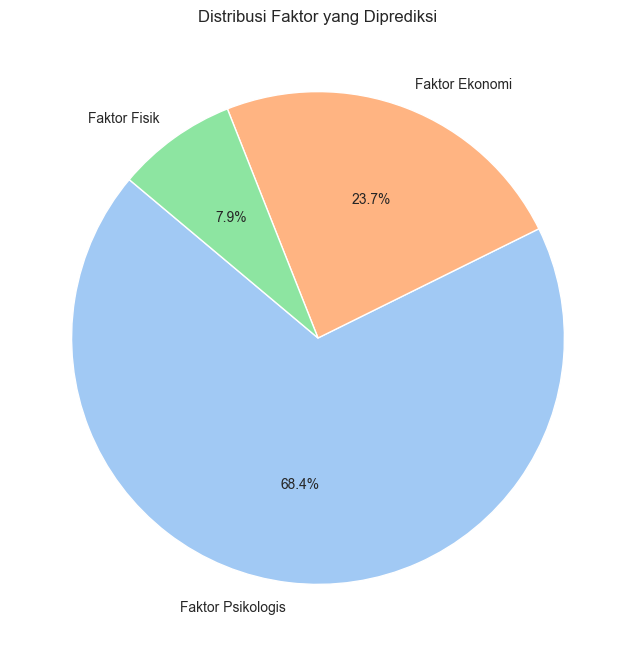

C:\Users\sanyd\AppData\Local\Temp\ipykernel_8144\3590776269.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(factor_counts.keys()), y=list(factor_counts.values()), palette="muted")


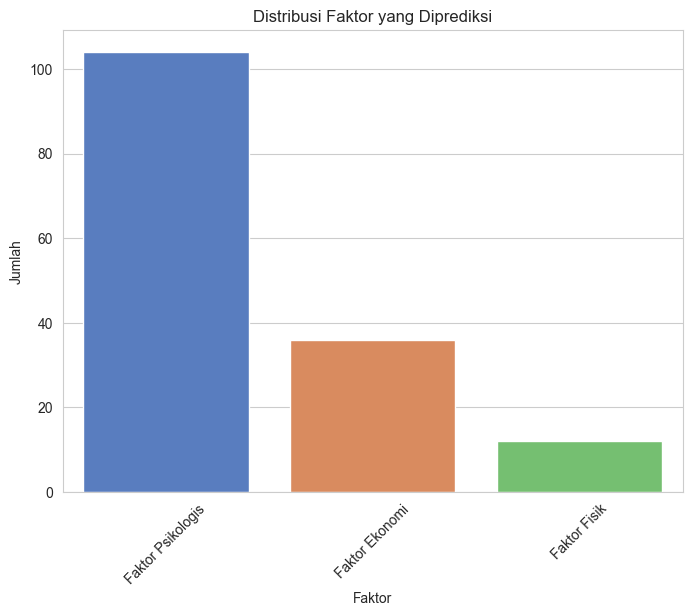

In [9]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load tokenizer dan model terbaik
model_path = "best_indobert_model_adamw"
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)
model.eval()  # Model dalam mode evaluasi

# Konfigurasi perangkat (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Dataset custom untuk DataLoader
class IndoBERTDatasetTest(Dataset):
    def __init__(self, texts, tokenizer, max_length=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]

        # Tokenisasi teks
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
        }

# Faktor kategori
faktor_labels = ["Faktor Fisik", "Faktor Psikologis", "Faktor Ekonomi", "Bukan Faktor"]

# Fungsi untuk memprediksi faktor terbesar
def predict_factors(model, data_loader, device):
    model.eval()
    results = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)

            # Prediksi model
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            probabilities = torch.softmax(logits, dim=1)  # Hitung probabilitas
            probabilities = probabilities.cpu().numpy()

            for prob in probabilities:
                # Kecualikan "Bukan Faktor"
                non_bukan_faktor = [(label, p) for label, p in zip(faktor_labels, prob) if label != "Bukan Faktor"]
                top_factor = max(non_bukan_faktor, key=lambda x: x[1])
                results.append(top_factor[0])  # Simpan nama faktor terbesar

    return results

# Data test yang telah dipisahkan sebelumnya
test_texts = test_dataset.texts  # Pastikan `test_dataset` sudah didefinisikan dari proses sebelumnya
test_loader = DataLoader(IndoBERTDatasetTest(test_texts, tokenizer), batch_size=16)

# Prediksi faktor untuk data test
predicted_factors = predict_factors(model, test_loader, device)

# Hitung distribusi faktor
factor_counts = Counter(predicted_factors)

# Visualisasi distribusi faktor menggunakan pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    factor_counts.values(),
    labels=factor_counts.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("Distribusi Faktor yang Diprediksi")
plt.show()

# Visualisasi distribusi faktor menggunakan bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=list(factor_counts.keys()), y=list(factor_counts.values()), palette="muted")
plt.title("Distribusi Faktor yang Diprediksi")
plt.ylabel("Jumlah")
plt.xlabel("Faktor")
plt.xticks(rotation=45)
plt.show()